In [30]:
from os.path import join as pjoin
import numpy as np
from dipy.viz import regtools
from dipy.data import fetch_stanford_hardi
from dipy.data.fetcher import fetch_syn_data
from dipy.io.image import load_nifti
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)
import scipy.io as sio

In [31]:
inputSpec = 'Patient_Data/pat83/pat083_hybridSortedInput2.mat'
h = sio.loadmat(inputSpec)
hybrid_data = h['hybrid_data']

FileNotFoundError: [Errno 2] No such file or directory: 'Patient_Data/pat83/pat083_hybridSortedInput2.mat'

In [3]:
"""
Let's fetch two b0 volumes, the static image will be the b0 from the Stanford
HARDI dataset
"""
files, folder = fetch_stanford_hardi()
static_data, static_affine, static_img = load_nifti(
                                            pjoin(folder, 'HARDI150.nii.gz'),
                                            return_img=True)
static = np.squeeze(static_data)[..., 0]
static_grid2world = static_affine

In [9]:
files, folder2 = fetch_syn_data()
moving_data, moving_affine, moving_img = load_nifti(
                                            pjoin(folder2, 'b0.nii.gz'),
                                            return_img=True)
moving = moving_data
moving_grid2world = moving_affine

In [19]:
"""
We can obtain a very rough (and fast) registration by just aligning the centers
of mass of the two images
"""

c_of_mass = transform_centers_of_mass(static, static_grid2world,
                                      moving, moving_grid2world)

'''
c_of_mass = transform_centers_of_mass(static, identity,
                                      moving, identity)

'''

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


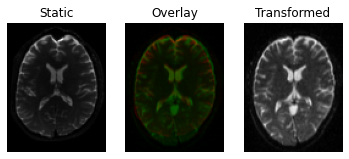

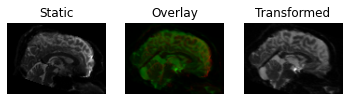

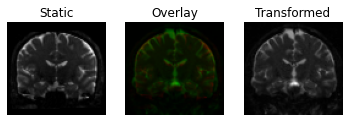

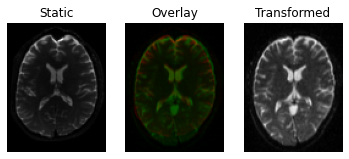

In [29]:
"""
Now, let's repeat this process with a simplified functional interface:
"""

from dipy.align import affine_registration

"""
This interface constructs a pipeline of operations from a given list of
transformations.
"""

pipeline = ["center_of_mass", "translation", "rigid", "affine"]

"""
And then applies the transformations in the pipeline on the input (from left to
right) with a call to an `affine_registration` function, which takes optional
settings for things like the iterations, sigmas and factors. The pipeline must
be a list of strings with one or more of the following transformations:
center_of_mass, translation, rigid, rigid_isoscaling, rigid_scaling and affine.
"""

xformed_img, reg_affine = affine_registration(
    moving,
    static,
    moving_affine=moving_affine,
    static_affine=static_affine,
    nbins=32,
    metric='MI',
    pipeline=pipeline,
    level_iters=level_iters,
    sigmas=sigmas,
    factors=factors)

regtools.overlay_slices(static, xformed_img, None, 0,
                        "Static", "Transformed", "xformed_affine_0.png")
regtools.overlay_slices(static, xformed_img, None, 1,
                        "Static", "Transformed", "xformed_affine_1.png")
regtools.overlay_slices(static, xformed_img, None, 2,
                        "Static", "Transformed", "xformed_affine_2.png")

